# **Feature Engineering**

## Objectives

* Create new features to improve model predictions.
* Transform and combine existing features.
* Explore the relationships between features and the target variable.

## Inputs

* Cleaned dataset: `outputs/datasets/collection/HousePricesRecords.csv`
* Data with handled missing values and correct data types.

## Outputs

* New dataset with engineered features: `outputs/datasets/feature_engineered/HousePricesFeatures.csv`
* Visualizations (if applicable): Charts showing feature relationships and distributions.


___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

___

## Load data

In [6]:
import pandas as pd
df = pd.read_csv("jupyter_notebooks/outputs/datasets/collection/HousePricesCleaned.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.000000,No,706.0,GLQ,150.0,548.0,RFn,2003.0,...,8450.0,65.0,196.0,61.0,5,7,856.0,2003,2003,208500.0
1,1262.0,0.0,3.000000,Gd,978.0,ALQ,284.0,460.0,RFn,1976.0,...,9600.0,80.0,0.0,0.0,8,6,1262.0,1976,1976,181500.0
2,920.0,866.0,3.000000,Mn,486.0,GLQ,434.0,608.0,RFn,2001.0,...,11250.0,68.0,162.0,42.0,5,7,920.0,2001,2002,223500.0
3,961.0,NaN,2.869214,No,216.0,ALQ,540.0,642.0,Unf,1998.0,...,9550.0,60.0,0.0,35.0,5,7,756.0,1915,1970,140000.0
4,1145.0,NaN,4.000000,Av,655.0,GLQ,490.0,836.0,RFn,2000.0,...,14260.0,84.0,350.0,84.0,5,8,1145.0,2000,2000,250000.0


Add total area and create basement indicator variable

In [ ]:
df['TotalArea'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea']
df['HasBasement'] = df['BsmtExposure'].apply(lambda x: 1 if x != 'No' else 0)

Show correlation matrix for numeric features

In [ ]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

Install seaborn

In [ ]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 199.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 189.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 182.7 MB/s eta 0:00:00


Convert text columns to numbers using category encoding

In [18]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category').cat.codes

correlation_matrix = df.corr()

Create a heatmap to visualize the correlation matrix

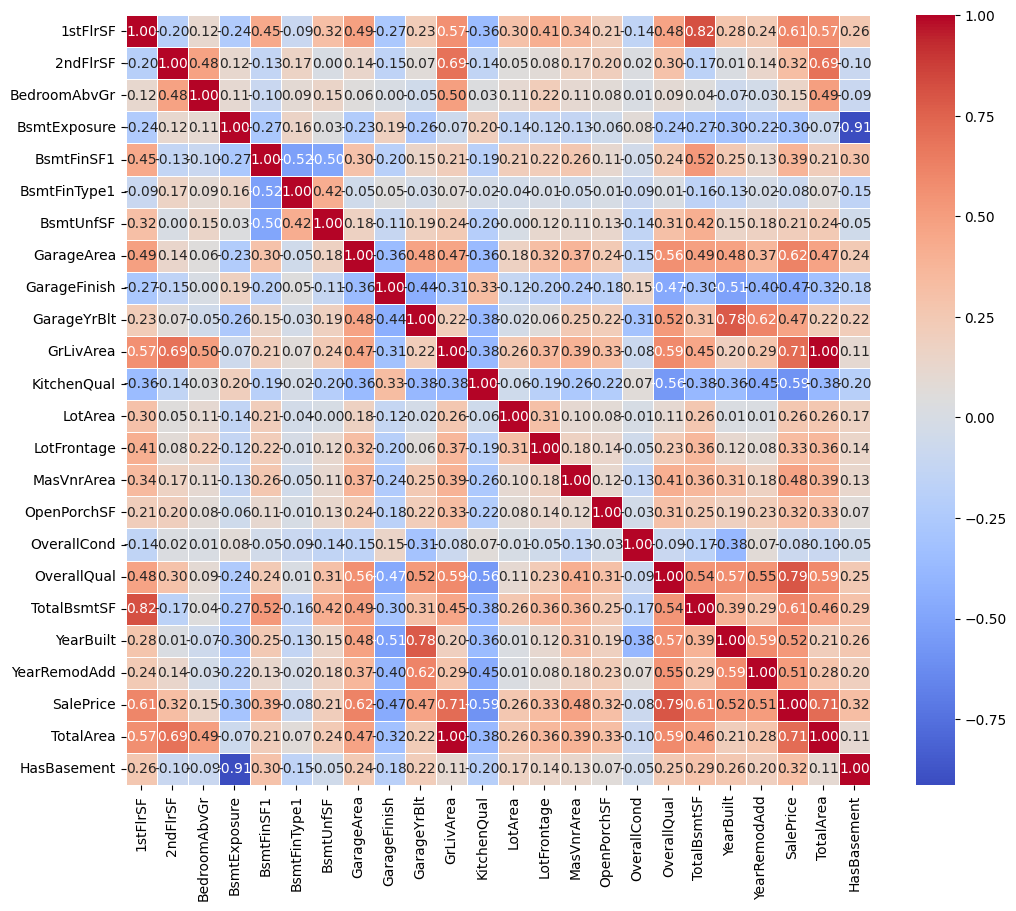

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


Remove columns with correlation above the threshold (0.8)

In [20]:
import pandas as pd

correlation_matrix = df.corr().abs()

threshold = 0.8

to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

df.drop(columns=to_drop, inplace=True)

print("Removed columns:", to_drop)

Removed columns: {'HasBasement', 'TotalBsmtSF', 'TotalArea'}


Install scitik learn

In [22]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 182.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 119.7 MB/s eta 0:00:0000:01


Scale numerical features to standardize their values

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'GrLivArea']] = scaler.fit_transform(df[['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'GrLivArea']])


Show datatypes

In [26]:
print(df.dtypes)


1stFlrSF        float64
2ndFlrSF        float64
BedroomAbvGr    float64
BsmtExposure       int8
BsmtFinSF1      float64
BsmtFinType1       int8
BsmtUnfSF       float64
GarageArea      float64
GarageFinish       int8
GarageYrBlt     float64
GrLivArea       float64
KitchenQual        int8
LotArea         float64
LotFrontage     float64
MasVnrArea      float64
OpenPorchSF     float64
OverallCond       int64
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
SalePrice       float64
dtype: object


Convert categorical columns to categories and apply One-Hot Encoding

In [27]:

df['BsmtExposure'] = df['BsmtExposure'].astype('category')
df['BsmtFinType1'] = df['BsmtFinType1'].astype('category')
df['GarageFinish'] = df['GarageFinish'].astype('category')
df['KitchenQual'] = df['KitchenQual'].astype('category')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], drop_first=True)


Print the number of unique values in each column

In [28]:
print(df.nunique())


1stFlrSF           753
2ndFlrSF           401
BedroomAbvGr         9
BsmtFinSF1         637
BsmtUnfSF          780
GarageArea         441
GarageYrBlt         98
GrLivArea          861
LotArea           1073
LotFrontage        111
MasVnrArea         328
OpenPorchSF        202
OverallCond          9
OverallQual         10
YearBuilt          112
YearRemodAdd        61
SalePrice          663
BsmtExposure_1       2
BsmtExposure_2       2
BsmtExposure_3       2
BsmtFinType1_1       2
BsmtFinType1_2       2
BsmtFinType1_3       2
BsmtFinType1_4       2
BsmtFinType1_5       2
GarageFinish_1       2
GarageFinish_2       2
KitchenQual_1        2
KitchenQual_2        2
KitchenQual_3        2
dtype: int64


Split data into training and test sets (70% training, 30% test)

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)  # Function
y = df['SalePrice']  # Target value

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(1022, 29) (438, 29)
(1022,) (438,)


Fill missing values, train model, and evaluate performance

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


imputer = SimpleImputer(strategy='mean')


X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


model = LinearRegression()
model.fit(X_train_imputed, y_train)


y_pred = model.predict(X_test_imputed)


print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MSE: 1034858271.2334186
R2 score: 0.8516990016634401


___

## Push files to repo